In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn import metrics


In [44]:
df = pd.read_csv('Rainfall_Pune(2009-2019).csv')
df.head()

,Date,maxtempC,mintempC,DewPointC,cloudcover,humidity,pressure,visibility,windspeedKmph,precipMM,RainToday,RainNextday
0,1/1/2009,31,13,7.166667,0.625000,37.125000,1012.875000,10.0,4.500000,0.0,0,0
1,1/2/2009,30,15,9.250000,3.833333,45.000000,1013.625000,10.0,5.458333,0.0,0,0
2,1/3/2009,30,15,10.208333,4.041667,48.625000,1014.833333,10.0,3.750000,0.0,0,0
3,1/4/2009,31,14,11.250000,5.291667,51.875000,1013.625000,10.0,2.583333,0.0,0,0
4,1/5/2009,30,15,11.208333,8.416667,51.208333,1011.750000,10.0,4.791667,0.0,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4018 non-null   object 
 1   maxtempC       4018 non-null   int64  
 2   mintempC       4018 non-null   int64  
 3   DewPointC      4018 non-null   float64
 4   cloudcover     4018 non-null   float64
 5   humidity       4018 non-null   float64
 6   pressure       4018 non-null   float64
 7   visibility     4018 non-null   float64
 8   windspeedKmph  4018 non-null   float64
 9   precipMM       4018 non-null   float64
 10  RainToday      4018 non-null   int64  
 11  RainNextday    4018 non-null   int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 376.8+ KB


In [46]:
vis_input  = df['visibility']
min_visibility = 0
max_visibility = 10
min_light_intensity = 1
max_light_intensity = 65535
scaling_factor = (max_light_intensity-min_light_intensity)/(max_visibility-min_visibility)
def visbilitytolight(vis_input):
    
    light_intensity = (vis_input - min_visibility) * scaling_factor + min_light_intensity
    return light_intensity

df['light_intensity'] = df['visibility'].apply(lambda x: visbilitytolight(x))
    

In [47]:
df['light_intensity'].describe()

count      4018.000000
mean      62149.633929
std        8505.561060
min        6554.400000
25%       62531.358336
50%       65535.000000
75%       65535.000000
max      131069.000000
Name: light_intensity, dtype: float64

In [48]:
df['Date']  = pd.to_datetime(df['Date'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4018 non-null   datetime64[ns]
 1   maxtempC         4018 non-null   int64         
 2   mintempC         4018 non-null   int64         
 3   DewPointC        4018 non-null   float64       
 4   cloudcover       4018 non-null   float64       
 5   humidity         4018 non-null   float64       
 6   pressure         4018 non-null   float64       
 7   visibility       4018 non-null   float64       
 8   windspeedKmph    4018 non-null   float64       
 9   precipMM         4018 non-null   float64       
 10  RainToday        4018 non-null   int64         
 11  RainNextday      4018 non-null   int64         
 12  light_intensity  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 408.2 KB


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

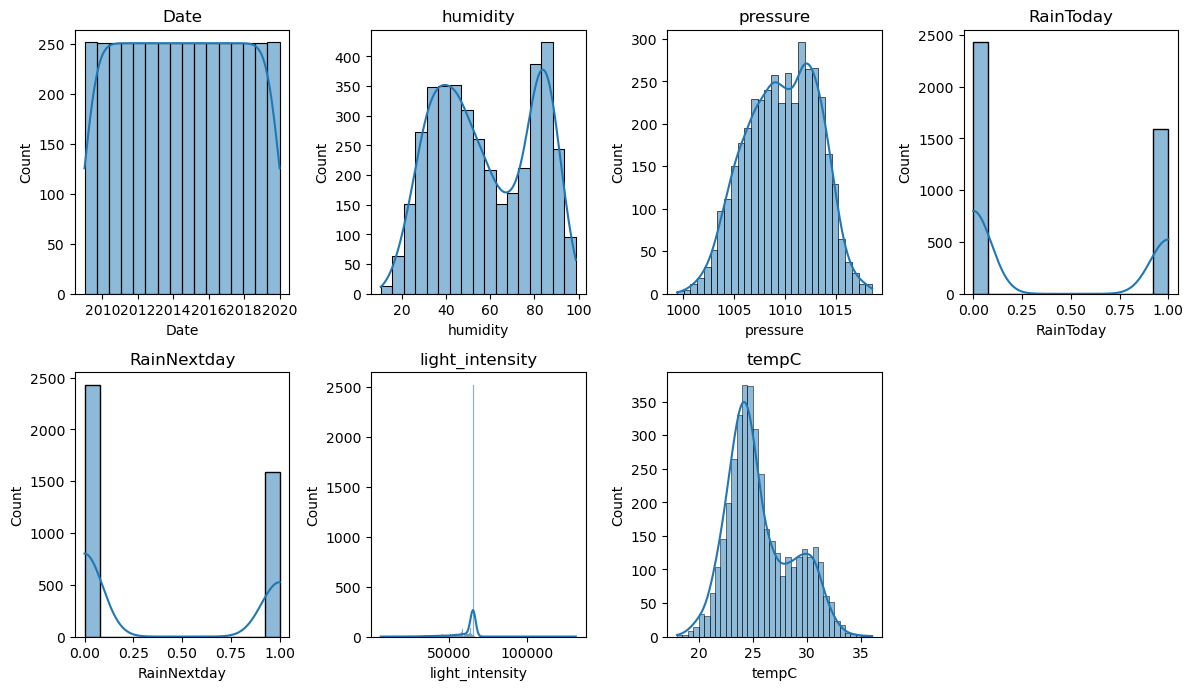

In [86]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [87]:
data.isnull().sum()

Date               0
humidity           0
pressure           0
RainToday          0
RainNextday        0
light_intensity    0
tempC              0
dtype: int64

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    if column != 'Date': 
        sns.scatterplot(data=data, x='RainToday', y=column)
        plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
sns.countplot(df['RainNextday'])


In [ ]:
df.columns

Text(0.5, 1.0, 'Correlation heatmap')

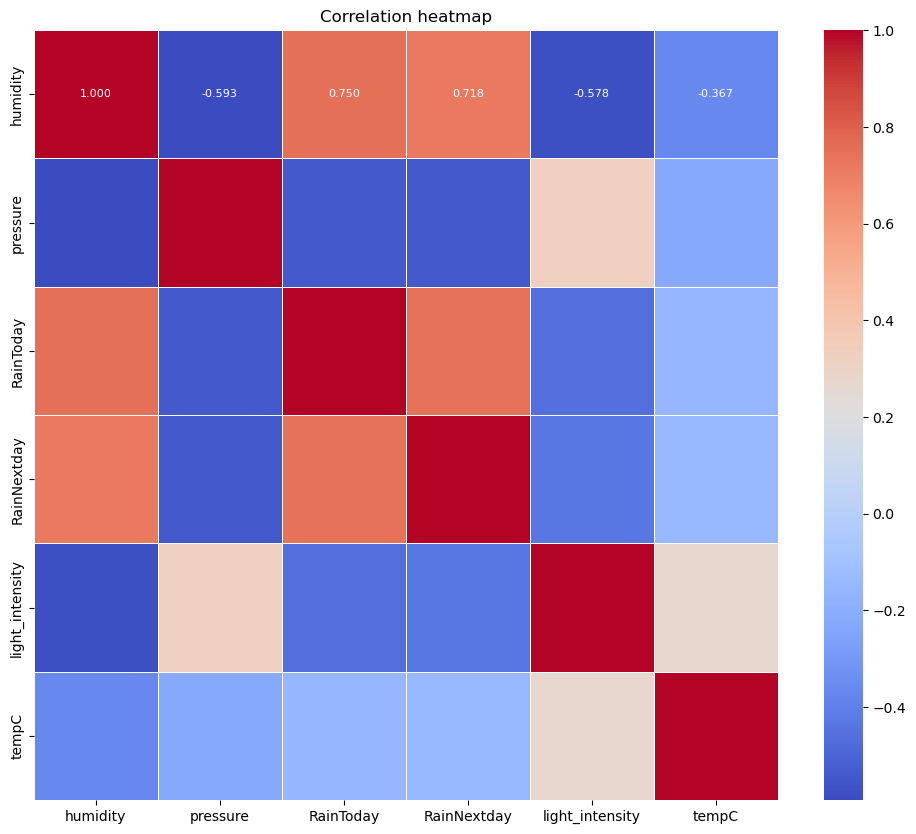

In [82]:
temp = data.drop(columns=['Date'])
co = temp.corr()
plt.figure(figsize=(12,10))
sns.heatmap(co,annot=True,cmap="coolwarm",linewidths='0.5',fmt='0.3f', annot_kws={"fontsize": 8})
plt.title("Correlation heatmap")


In [83]:
temp.corr()

,humidity,pressure,RainToday,RainNextday,light_intensity,tempC
humidity,1.000000,-0.592649,0.749593,0.717714,-0.577671,-0.366948
pressure,-0.592649,1.000000,-0.542491,-0.547469,0.329026,-0.225587
RainToday,0.749593,-0.542491,1.000000,0.738761,-0.462247,-0.155463
RainNextday,0.717714,-0.547469,0.738761,1.000000,-0.432964,-0.140241
light_intensity,-0.577671,0.329026,-0.462247,-0.432964,1.000000,0.270542
tempC,-0.366948,-0.225587,-0.155463,-0.140241,0.270542,1.000000


In [54]:
mean_of_rows = df[['mintempC', 'maxtempC']].mean(axis=1)

In [55]:
df['tempC'] = mean_of_rows

In [56]:
df.shape

(4018, 14)

In [57]:
data=df.drop(columns=['maxtempC','mintempC','DewPointC','cloudcover','precipMM','windspeedKmph','visibility'],axis=1)

In [58]:
data

,Date,humidity,pressure,RainToday,RainNextday,light_intensity,tempC
0,2009-01-01,37.125000,1012.875000,0,0,65535.000000,22.0
1,2009-01-02,45.000000,1013.625000,0,0,65535.000000,22.5
2,2009-01-03,48.625000,1014.833333,0,0,65535.000000,22.5
3,2009-01-04,51.875000,1013.625000,0,0,65535.000000,22.5
4,2009-01-05,51.208333,1011.750000,0,0,65535.000000,22.5
...,...,...,...,...,...,...,...
4013,2019-12-28,71.958333,1012.250000,0,1,65535.000000,22.0
4014,2019-12-29,65.291667,1012.958333,1,0,64988.883336,22.5
4015,2019-12-30,68.250000,1012.083333,0,0,65535.000000,23.5
4016,2019-12-31,57.583333,1013.166667,0,0,65535.000000,23.5


In [59]:
x.to_csv('Input_SVC')

In [60]:
print(x.shape)

(4018, 5)


In [62]:
x = data.drop(['Date',"RainNextday"],axis=1)
y = data["RainNextday"]

In [93]:
print(x.columns)

Index(['humidity', 'pressure', 'RainToday', 'light_intensity', 'tempC'], dtype='object')


In [64]:
print(np.array(x))
print(np.array(y))

[[3.71250000e+01 1.01287500e+03 0.00000000e+00 6.55350000e+04
  2.20000000e+01]
 [4.50000000e+01 1.01362500e+03 0.00000000e+00 6.55350000e+04
  2.25000000e+01]
 [4.86250000e+01 1.01483333e+03 0.00000000e+00 6.55350000e+04
  2.25000000e+01]
 ...
 [6.82500000e+01 1.01208333e+03 0.00000000e+00 6.55350000e+04
  2.35000000e+01]
 [5.75833333e+01 1.01316667e+03 0.00000000e+00 6.55350000e+04
  2.35000000e+01]
 [4.72083333e+01 1.01358333e+03 0.00000000e+00 6.55350000e+04
  2.35000000e+01]]
[0 0 0 ... 0 0 0]


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [67]:
print(x.shape,x_train.shape,x_test.shape)

(4018, 5) (3214, 5) (804, 5)


In [68]:
model = XGBClassifier()

model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy*100)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  86.44278606965175
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       484
           1       0.80      0.87      0.84       320

    accuracy                           0.86       804
   macro avg       0.86      0.87      0.86       804
weighted avg       0.87      0.86      0.87       804



[0]
It will not rain tomorrow


In [71]:
np.array(x.iloc[-1])

array([4.72083333e+01, 1.01358333e+03, 0.00000000e+00, 6.55350000e+04,
       2.35000000e+01])

In [ ]:
y.iloc[-1]

In [101]:

x = x.reindex(columns=['tempC', 'humidity', 'pressure', 'light_intensity', 'RainToday'])
print(x)

      tempC   humidity     pressure  light_intensity  RainToday
0      22.0  37.125000  1012.875000     65535.000000          0
1      22.5  45.000000  1013.625000     65535.000000          0
2      22.5  48.625000  1014.833333     65535.000000          0
3      22.5  51.875000  1013.625000     65535.000000          0
4      22.5  51.208333  1011.750000     65535.000000          0
...     ...        ...          ...              ...        ...
4013   22.0  71.958333  1012.250000     65535.000000          0
4014   22.5  65.291667  1012.958333     64988.883336          1
4015   23.5  68.250000  1012.083333     65535.000000          0
4016   23.5  57.583333  1013.166667     65535.000000          0
4017   23.5  47.208333  1013.583333     65535.000000          0

[4018 rows x 5 columns]


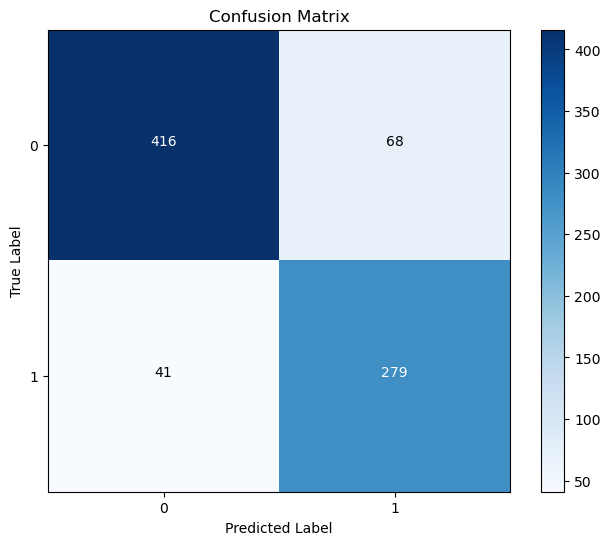

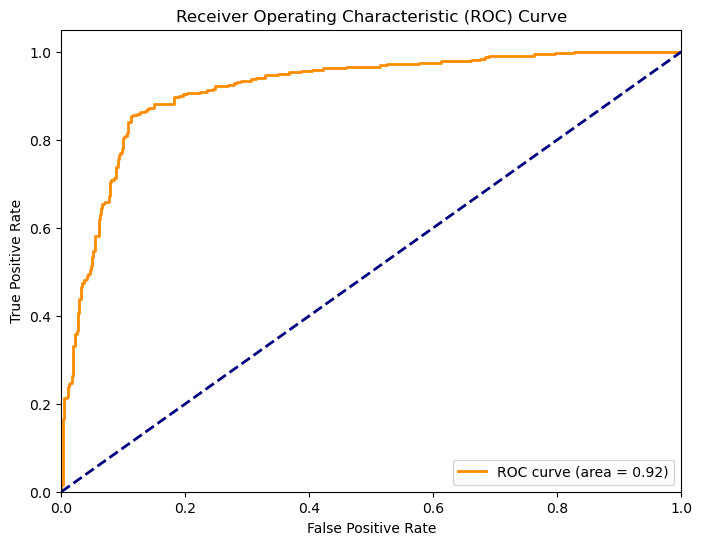

In [89]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [90]:
x.iloc[-1]

humidity              47.208333
pressure            1013.583333
RainToday              0.000000
light_intensity    65535.000000
tempC                 23.500000
Name: 4017, dtype: float64

In [99]:
import csv

# Specify the path to your CSV file
csv_file_path = 'Input_SVC'

# Initialize an empty list to store the last line
last_line = []

# Open the CSV file
with open(csv_file_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    
    # Iterate through each line in the CSV file
    for row in csv_reader:
        # Store the current line in the list
        last_line = row
    
input_data = (last_line[1],last_line[2],last_line[3],last_line[4],last_line[5])
print(input_data)
#input format ['humidity', 'pressure', 'RainToday', 'light_intensity', 'tempC']
input_reshaped = np.reshape(input_data, (1, -1))

outcome = model.predict(input_reshaped)

print(outcome)
if outcome==0:
    print("It will not rain tomorrow")
else:
    print("It will rain tomorrow")

('47.20833333', '1013.583333', '0', '65535.0', '23.5')


XGBoostError: [12:27:16] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\data\array_interface.h:492: Unicode-1 is not supported.